**-----------------------------------------------------------------------------------------------------------------**

*In this lecture we are going to explore:*

1. What is Named Entity Recognition (NER)?
2. What are Methods, Use Cases, and Challenges in NLP?
3. Python implementation of Named Entity Recognition (NER).

**-----------------------------------------------------------------------------------------------------------------**

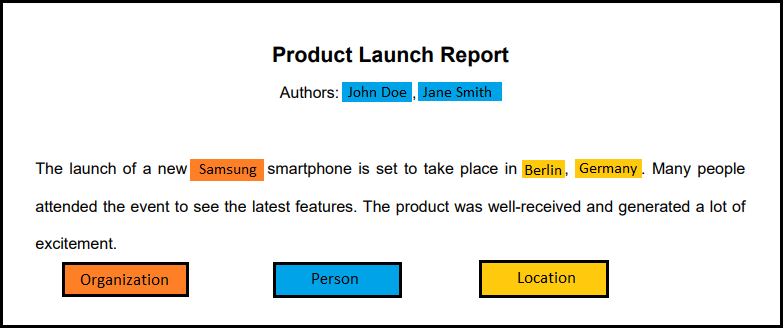

# 3.3 Named Entity Recognition (NER)
### Named Entities (NER - Named Entity Recognition) : is used in spaCy to extract and print Named Entities (NER - Named Entity Recognition) from a given text.

#### Named entity recognition (NER)—also called entity chunking or entity extraction—is a component of natural language processing (NLP) that identifies predefined categories of objects in a body of text.

* Named Entity Recognition (NER) is a sub-task of information extraction in Natural Language Processing (NLP) that classifies named entities into predefined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, and more.
* Named Entity Recognition (NER) serves as a bridge between unstructured text and structured data, enabling machines to sift through vast amounts of textual information and extract nuggets of valuable data in categorized forms. By pinpointing specific entities within a sea of words, NER transforms the way we process and utilize textual data.

In [1]:
import spacy
from spacy import displacy
from spacy import tokenizer
import re
nlp = spacy.load('en_core_web_sm')

In [2]:
google_text = "Google was founded on September 4, 1998, by computer scientists Larry Page and Sergey Brin while they were PhD students at Stanford University in California. Together they own about 14% of its publicly listed shares and control 56% of its stockholder voting power through super-voting stock. The company went public via an initial public offering (IPO) in 2004. In 2015, Google was reorganized as a wholly owned subsidiary of Alphabet Inc. Google is Alphabet's largest subsidiary and is a holding company for Alphabet's internet properties and interests. Sundar Pichai was appointed CEO of Google on October 24, 2015, replacing Larry Page, who became the CEO of Alphabet. On December 3, 2019, Pichai also became the CEO of Alphabet."
print(google_text)

Google was founded on September 4, 1998, by computer scientists Larry Page and Sergey Brin while they were PhD students at Stanford University in California. Together they own about 14% of its publicly listed shares and control 56% of its stockholder voting power through super-voting stock. The company went public via an initial public offering (IPO) in 2004. In 2015, Google was reorganized as a wholly owned subsidiary of Alphabet Inc. Google is Alphabet's largest subsidiary and is a holding company for Alphabet's internet properties and interests. Sundar Pichai was appointed CEO of Google on October 24, 2015, replacing Larry Page, who became the CEO of Alphabet. On December 3, 2019, Pichai also became the CEO of Alphabet.


In [3]:
spacy_doc = nlp(google_text)

In [5]:
print(spacy_doc)

Google was founded on September 4, 1998, by computer scientists Larry Page and Sergey Brin while they were PhD students at Stanford University in California. Together they own about 14% of its publicly listed shares and control 56% of its stockholder voting power through super-voting stock. The company went public via an initial public offering (IPO) in 2004. In 2015, Google was reorganized as a wholly owned subsidiary of Alphabet Inc. Google is Alphabet's largest subsidiary and is a holding company for Alphabet's internet properties and interests. Sundar Pichai was appointed CEO of Google on October 24, 2015, replacing Larry Page, who became the CEO of Alphabet. On December 3, 2019, Pichai also became the CEO of Alphabet.


In [4]:
for word in spacy_doc.ents:
    print(word.text,word.label_)

Google ORG
September 4, 1998 DATE
Larry Page PERSON
Sergey Brin PERSON
PhD WORK_OF_ART
Stanford University ORG
California GPE
about 14% PERCENT
56% PERCENT
IPO ORG
2004 DATE
2015 DATE
Google ORG
Alphabet Inc. ORG
Alphabet GPE
Alphabet GPE
Sundar Pichai PERSON
Google ORG
October 24, 2015 DATE
Larry Page PERSON
Alphabet GPE
December 3, 2019 DATE
Pichai PERSON
Alphabet GPE


In [11]:
displacy.render(spacy_doc,style="ent",jupyter=True)
# The literal meaning of "render" is "to present, display, or generate output" in a visual or usable form.
# style="ent" --->>> Common Named Entity Labels in spaCy

**...let's see if cleaning our text up a little bit improves the tagging**

In [7]:
google_text_clean = re.sub(r'[^\w\s]', '', google_text).lower() # remove punctuation and lowercase
print(google_text_clean)

google was founded on september 4 1998 by computer scientists larry page and sergey brin while they were phd students at stanford university in california together they own about 14 of its publicly listed shares and control 56 of its stockholder voting power through supervoting stock the company went public via an initial public offering ipo in 2004 in 2015 google was reorganized as a wholly owned subsidiary of alphabet inc google is alphabets largest subsidiary and is a holding company for alphabets internet properties and interests sundar pichai was appointed ceo of google on october 24 2015 replacing larry page who became the ceo of alphabet on december 3 2019 pichai also became the ceo of alphabet


In [8]:
spacy_doc_clean = nlp(google_text_clean)

In [9]:
for word in spacy_doc_clean.ents:
    print(word.text,word.label_)

google ORG
september 4 1998 DATE
larry PERSON
phd ORG
stanford university ORG
california GPE
about 14 CARDINAL
56 CARDINAL
2004 DATE
2015 DATE
alphabet inc google ORG
pichai PERSON
google ORG
october 24 2015 DATE
larry PERSON
december 3 2019 DATE


In [10]:
displacy.render(spacy_doc_clean,style="ent",jupyter=True)

### Named Entity Recognition Use Cases

##### NER has found applications across diverse sectors, transforming the way we extract and utilize information. Here's a glimpse into some of its pivotal applications:

* News aggregation. NER is instrumental in categorizing news articles by the primary entities mentioned. This categorization aids readers in swiftly locating stories about specific people, places, or organizations, streamlining the news consumption process.

* Customer support. Analyzing customer queries becomes more efficient with NER. Companies can swiftly pinpoint common issues related to specific products or services, ensuring that customer concerns are addressed promptly and effectively.

* Research. For academics and researchers, NER is a boon. It allows them to scan vast volumes of text, identifying mentions of specific entities relevant to their studies. This automated extraction speeds up the research process and ensures comprehensive data analysis.

* Legal document analysis. In the legal sector, sifting through lengthy documents to find relevant entities like names, dates, or locations can be tedious. NER automates this, making legal research and analysis more efficient.

* Information extraction: NER is a crucial first step in extracting useful, structured information from large, unstructured databases. Search engines use NER to improve the relevance and preciseness of their search results.

* Social media monitoring: With the proliferation of social media platforms, the amount of textual data available for analysis is overwhelming. NER plays a significant role in social media analysis, identifying key entities in posts and comments to understand trends and public opinions about different topics (especially opinions around brands and products). This information can help companies conduct sentiment analyses, develop marketing strategies, craft customer service responses and accelerate product development efforts.

* Chatbots and virtual assistants: Virtual assistants and generative artificial intelligence chatbots and use NER to understand user requests and customer support queries accurately. By identifying critical entities in user queries, these AI-powered tools can provide precise, context-specific responses. For example, in the query "Find Soul Food restaurants near Piedmont Park," NER helps the assistant understand "Soul Food" as the cuisine, "restaurants" as the type of establishment and "Piedmont Park" as the location.

* Cybersecurity: In cybersecurity, NER helps companies identify potential threats and anomalies in network logs and other security-related data. For example, it can identify suspicious IP addresses, URLs, usernames and filenames in network security logs. As such, NER can facilitate more thorough security incident investigations and improve overall network security.

* Resume Filtering: Filtering out resumes for finding  apt candidates for a job role, Do you think that all the resumes that are sent while applying for a particular job role are read by the recruiting team? Well, the fact is that only 25 percent of the resumes are read by people. The rest are filtered out by an automated system.
 